### Import Libraries ###

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
import sklearn.utils
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, ElasticNet, Lasso
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
from sklearn.metrics import make_scorer
from sklearn.naive_bayes import GaussianNB
from vecstack import stacking



%matplotlib inline
sns.set_style('white')
import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

In [4]:
boston = load_boston()

In [6]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Additional References ###


Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.

Gilley, O.W., and R. Kelley Pace, On the Harrison and Rubinfeld Data, Journal of Environmental Economics and Management, 31 (1996),403-405. Provided corrections and examined censoring.



In [8]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [32]:
cols = boston.feature_names

In [10]:
bostonhousing = pd.DataFrame(boston.data)
bostonhousing.columns = boston.feature_names

In [11]:
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
bostonhousing['MEDV'] = boston.target

In [15]:
bostonhousing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


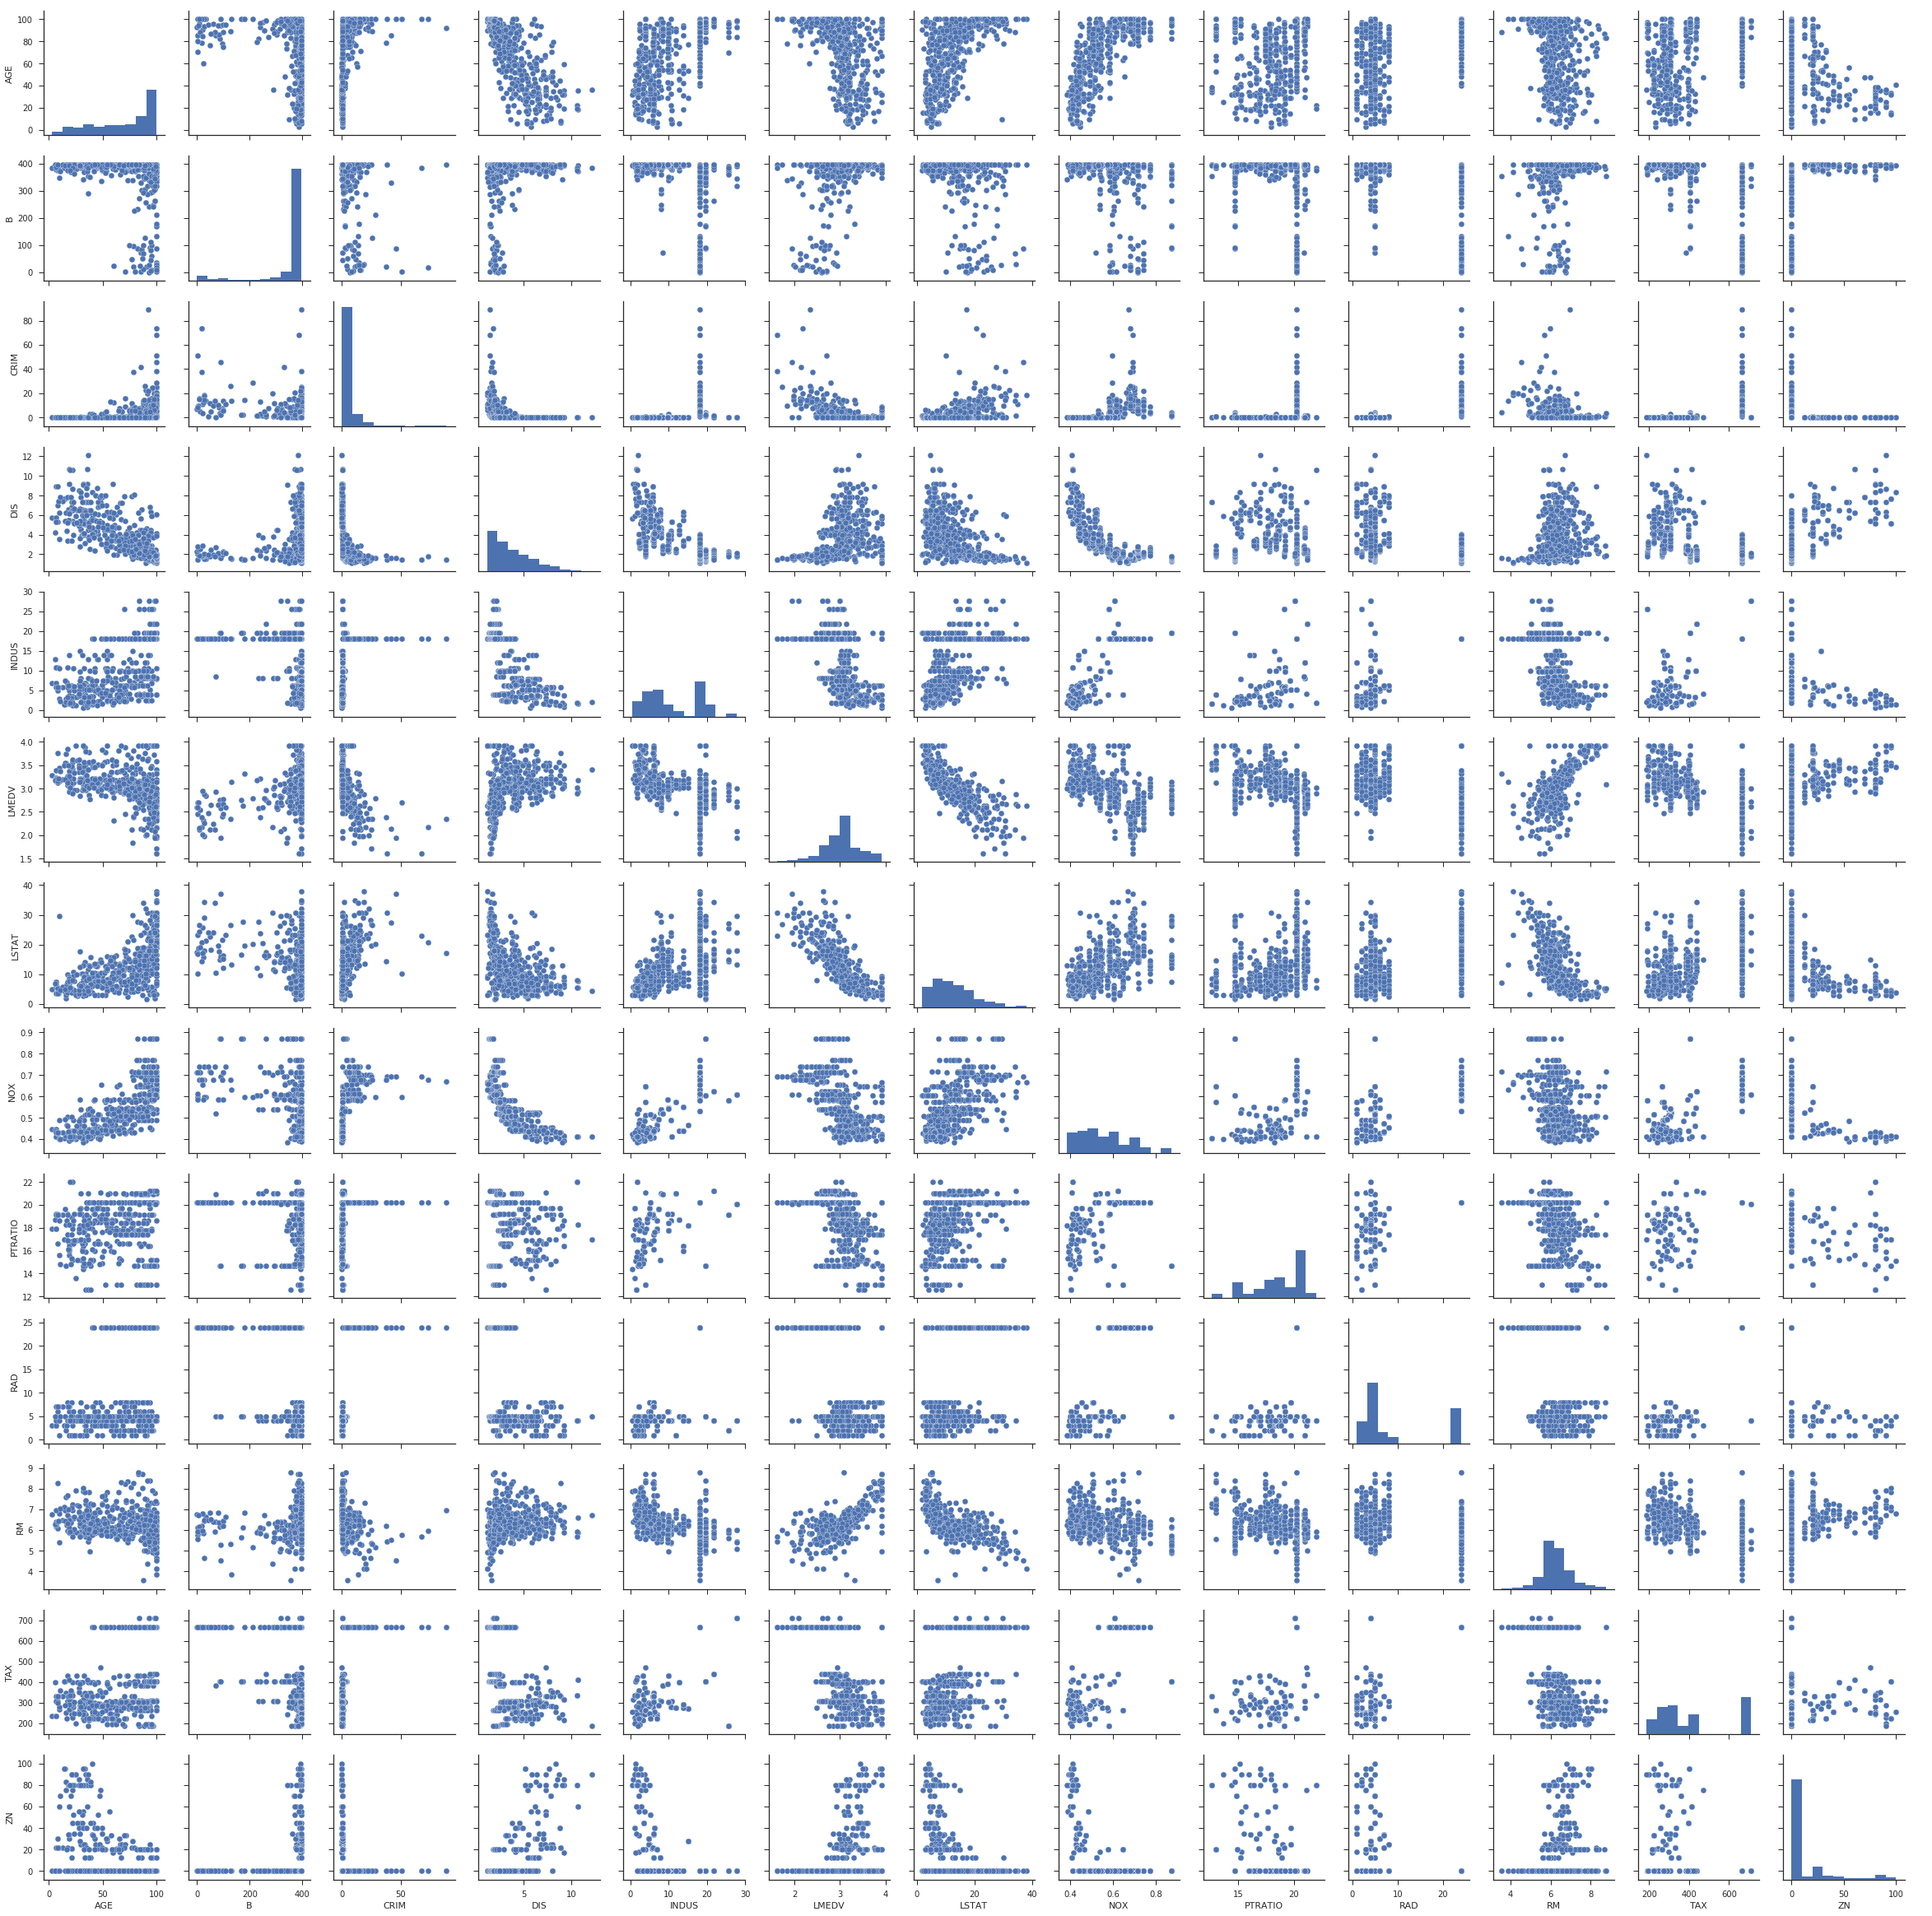

In [27]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(bostonhousing, palette="husl", vars=bostonhousing.columns.difference(['MEDV','CHAS']))
g = g.add_legend()

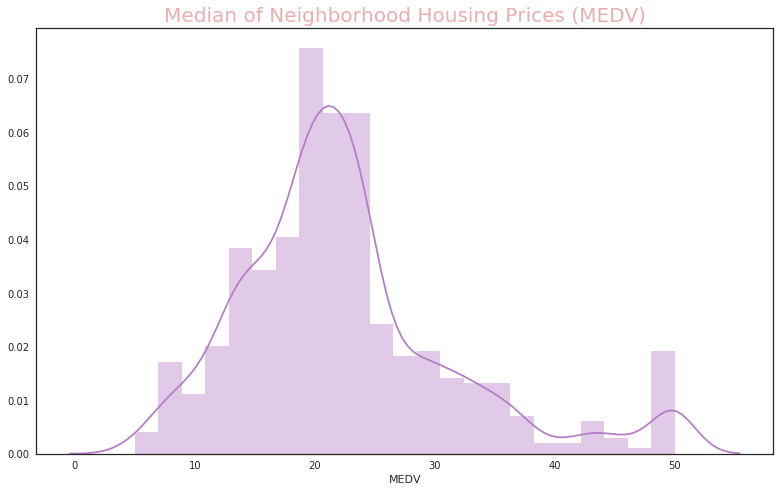

In [30]:
sns.set(style="white", palette="muted", color_codes=True)
fig, ax = plt.subplots(figsize=(11,7))

g = sns.distplot(bostonhousing['MEDV'],ax = ax, color="m")
g.set_title("Median of Neighborhood Housing Prices (MEDV)",fontsize=20,color="r",alpha=0.5)
plt.tight_layout()


In [14]:
bostonhousing.loc[bostonhousing['MEDV']==50.0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


### Log Transformation of Dependent Variable MEDV ###

* Definite right skew of non-negative variabel - Use a log transform to normalize.

* In the above histogram, we can see the peak from the 16 observations of 50. (MEDV)

* Data is well known (REF??) to have 16 censored (to the right) observations at 50.0

* My choice is to keep all data as we only have 506 obs.

* Final choice is to keep all data points and use log transform.

In [22]:
bostonhousing['LMEDV'] = np.log(bostonhousing['MEDV'])

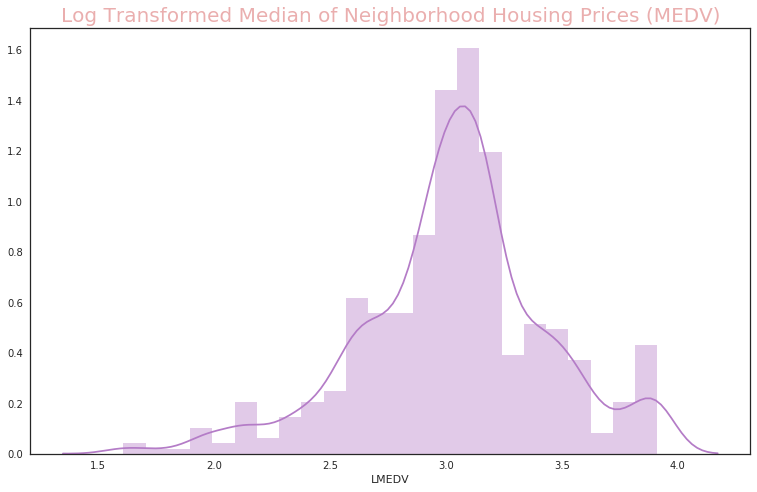

In [31]:
sns.set(style="white", palette="muted", color_codes=True)
fig, ax = plt.subplots(figsize=(11,7))

g = sns.distplot(bostonhousing['LMEDV'],ax = ax, color="m")
g.set_title("Log Transformed Median of Neighborhood Housing Prices (MEDV)",fontsize=20,color="r",alpha=0.5)
plt.tight_layout()

In [55]:
newcol = list(cols)
newcol = newcol.pop(3)
print(newcol)

CHAS


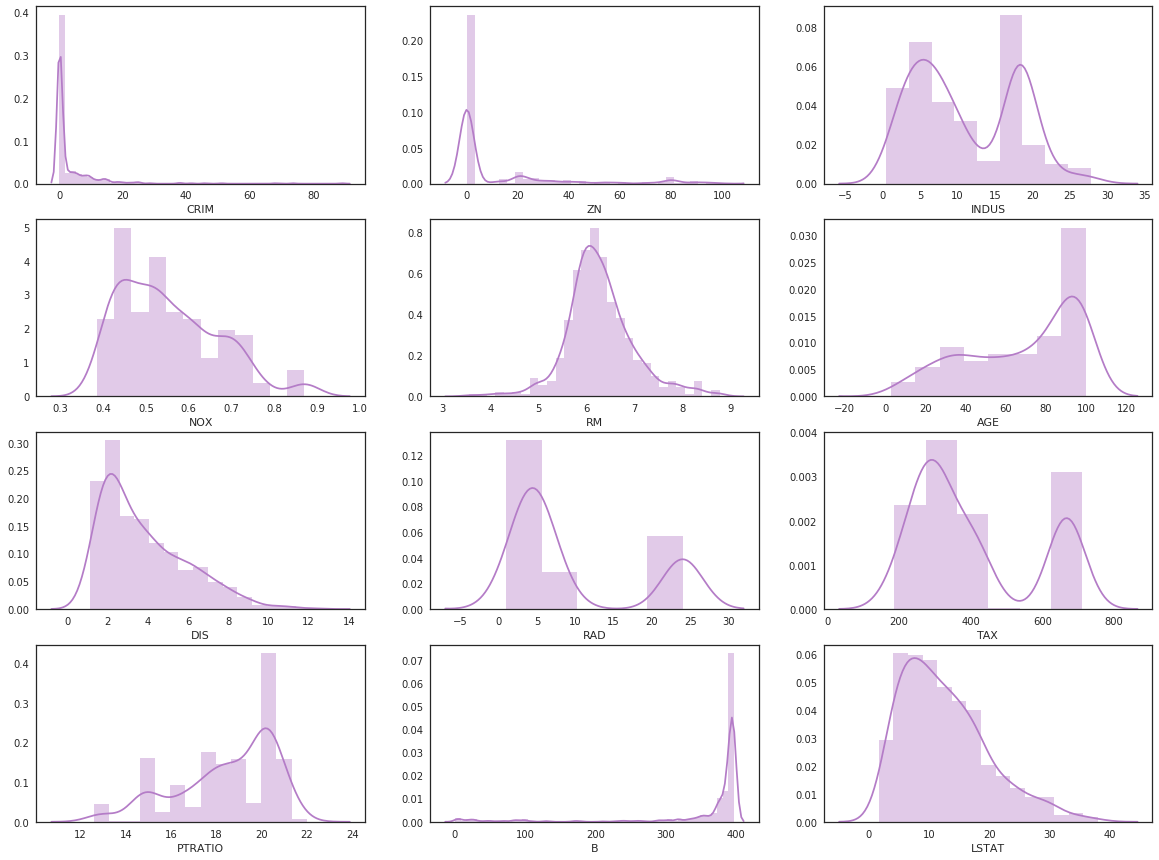

In [78]:
sns.set(style="white", palette="muted", color_codes=True)
colums = ['CRIM' ,'ZN', 'INDUS' , 'NOX', 'RM', 'AGE' ,'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
plt.figure(figsize=(20, 15))
for i, col in enumerate(colums):
    plt.subplot(4,3,i+1)
    x = bostonhousing[col]
    g = sns.distplot(x, color="m")
    plt.xlabel(col)
    #fig.xtitle(col)

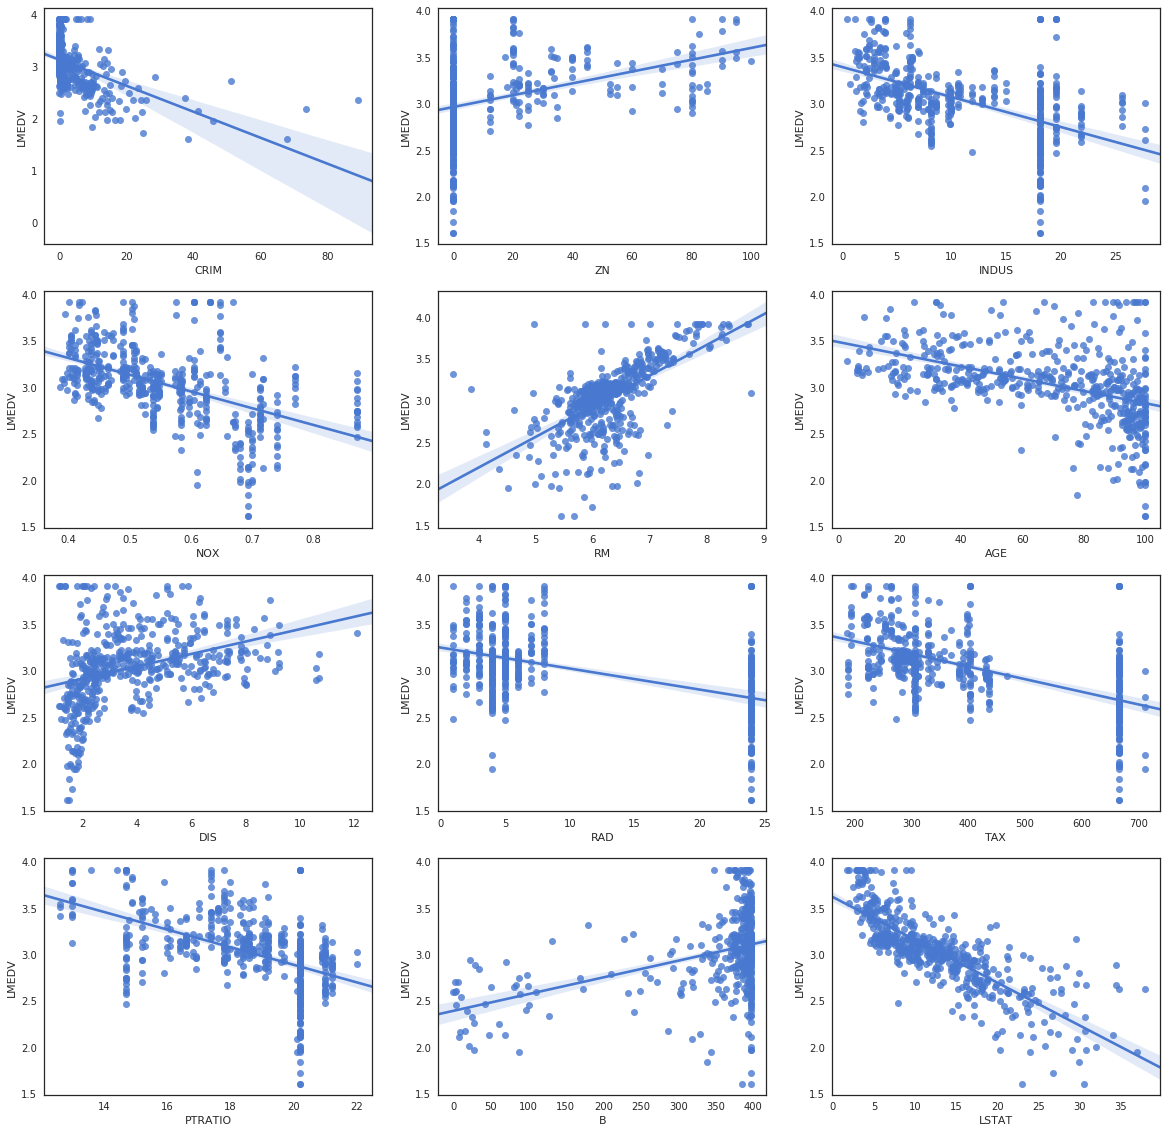

In [89]:
sns.set(style="white", palette="muted", color_codes=True)
colums = ['CRIM' ,'ZN', 'INDUS' , 'NOX', 'RM', 'AGE' ,'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
plt.figure(figsize=(20, 20))
for i, col in enumerate(colums):
    plt.subplot(4,3,i+1)
    g = sns.regplot(col, 'LMEDV',data=bostonhousing )
    plt.xlabel(col)
    #fig.xtitle(col)

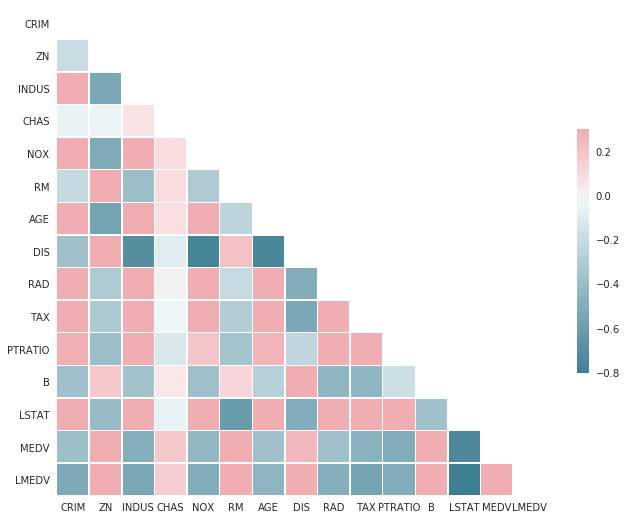

In [91]:
# Compute the correlation matrix
corr = bostonhousing.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Attributes ###

* LMDEDV appears to strengthen correlations compared to MEDV

* LSTAT has the highest negative correlation to LMEDV, TAX is also highly negatively correlated.

* RM and DIS has the highest positive correlations

In [107]:
X, y = bostonhousing.loc[:,bostonhousing.columns.difference(['MEDV','LMEDV'])], bostonhousing['LMEDV']

In [108]:
X.columns

Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [114]:
X_train['intercept'] = 1
lr = sm.OLS(y_train, X_train.astype(float))
result = lr.fit()


print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  LMEDV   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 07 May 2018   Prob (F-statistic):          1.28e-125
Time:                        05:17:46   Log-Likelihood:                 106.83
No. Observations:                 404   AIC:                            -185.7
Df Residuals:                     390   BIC:                            -129.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0001      0.001     -0.230      0.8

In [115]:
X_train = X_train.drop('intercept', axis=1)

In [120]:
lams = [0.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]

for lam in lams:
    ridge = Ridge(alpha=lam)
    ridge.fit(X_train, y_train)
    
    lasso = linear_model.Lasso(alpha=lam)
    lasso.fit(X_train, y_train)
    
    print("lambda {}, ridge score = {:.3f}, lasso score = {:.3f}".format(lam,ridge.score(X_train, y_train), lasso.score(X_train, y_train)))

lambda 0.01, ridge score = 0.796, lasso score = 0.781
lambda 0.1, ridge score = 0.796, lasso score = 0.718
lambda 0.2, ridge score = 0.796, lasso score = 0.689
lambda 0.3, ridge score = 0.795, lasso score = 0.673
lambda 0.4, ridge score = 0.795, lasso score = 0.657
lambda 0.5, ridge score = 0.795, lasso score = 0.637
lambda 0.6, ridge score = 0.795, lasso score = 0.620
lambda 0.7, ridge score = 0.794, lasso score = 0.600
lambda 0.8, ridge score = 0.794, lasso score = 0.576
lambda 0.9, ridge score = 0.794, lasso score = 0.549
lambda 1.0, ridge score = 0.794, lasso score = 0.519


In [156]:
clf1 =RandomForestRegressor(random_state=42, n_jobs=-1, 
                           n_estimators=200, max_depth=5,max_features=5, min_samples_split=10)

scores = cross_val_score(clf1, X_train, y_train, cv=5)
print("crossValscores mean = {:.3f}".format(scores.mean()))
clf1.fit(X_train, y_train)

crossValscores mean = 0.831


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [157]:
y_pred = clf1.predict(X_test)
# Final prediction score
print('Final prediction score: [%.3f]' % r2_score(y_test, y_pred))

Final prediction score: [0.833]


In [158]:
clf2 = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)
scores = cross_val_score(clf2, X_train, y_train, cv=5)
print("crossValscores mean = {:.3f}".format(scores.mean()))
clf2.fit(X_train, y_train)

crossValscores mean = 0.856


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [159]:
y_pred = clf2.predict(X_test)
# Final prediction score
print('Final prediction score: [%.3f]' % r2_score(y_test, y_pred))

Final prediction score: [0.850]


In [166]:
# scale the input into mean 0 and standardized variance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
scaler = StandardScaler()
sc = scaler.fit(X_train)
scaled_X = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

In [167]:
from sklearn.svm import SVR
clf3 = SVR(kernel='linear')
scores = cross_val_score(clf3, scaled_X, y_train, cv=5)
print("crossValscores mean = {:.3f}".format(scores.mean()))
clf3.fit(scaled_X, y_train)

crossValscores mean = 0.763


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [168]:
y_pred = clf3.predict(X_test_scale)
# Final prediction score
print('Final prediction score: [%.3f]' % r2_score(y_test, y_pred))

Final prediction score: [0.711]


In [169]:
clf4 = SVR(kernel='rbf')
scores = cross_val_score(clf4, scaled_X, y_train, cv=5)
print("crossValscores mean = {:.3f}".format(scores.mean()))
clf4.fit(scaled_X, y_train)

crossValscores mean = 0.840


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [170]:
y_pred = clf4.predict(X_test_scale)
# Final prediction score
print('Final prediction score: [%.3f]' % r2_score(y_test, y_pred))

Final prediction score: [0.832]


## Begin Stacking Model ##

In [121]:
# Stacking
from vecstack import stacking

In [179]:



# Stage 0 models
models_0 = [ 
    LinearRegression(),
    
    #ExtraTreesRegressor(random_state=42, n_jobs=-1, 
    #                     n_estimators=200, max_depth=3),
                         
    RandomForestRegressor(random_state=42, n_jobs=-1, 
                           n_estimators=200, max_depth=5,max_features=5, min_samples_split=10),
    
    GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)
    ]


In [180]:
S_train, S_test = stacking(models_0,                     # list of models
                           X_train, y_train, X_test,   # data
                           regression=True,            # regression task (if you need 
                                                       #     classification - set to False)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and find mean
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=sklearn.metrics.r2_score,
                           n_folds=5,                  # number of folds
                           shuffle=True,               # shuffle the data
                           random_state=42,             # ensure reproducibility
                           verbose=2)                  # print all info


task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LinearRegression]
    fold  0:  [0.77156793]
    fold  1:  [0.75783366]
    fold  2:  [0.68312880]
    fold  3:  [0.82251863]
    fold  4:  [0.80240229]
    ----
    MEAN:     [0.76749026] + [0.04790345]
    FULL:     [0.77153419]

model  1:     [RandomForestRegressor]
    fold  0:  [0.79823516]
    fold  1:  [0.84551000]
    fold  2:  [0.74577973]
    fold  3:  [0.87752404]
    fold  4:  [0.88190913]
    ----
    MEAN:     [0.82979161] + [0.05156645]
    FULL:     [0.83305153]

model  2:     [GradientBoostingRegressor]
    fold  0:  [0.84048042]
    fold  1:  [0.88009624]
    fold  2:  [0.82879908]
    fold  3:  [0.84607838]
    fold  4:  [0.89154385]
    ----
    MEAN:     [0.85739959] + [0.02413871]
    FULL:     [0.85802513]



In [181]:
S_train[:5]

array([[2.48094655, 2.54460739, 2.51365289],
       [2.98787226, 3.00731979, 2.97176084],
       [3.14633959, 3.0853199 , 2.98182908],
       [2.43800752, 2.5924271 , 2.43499909],
       [2.93554449, 2.99187487, 2.94879838]])

In [182]:
S_test[:5]

array([[3.33160853, 3.13736124, 3.15852252],
       [3.61518452, 3.43619764, 3.45204438],
       [2.71004181, 2.74481057, 2.7673449 ],
       [3.24932556, 3.14656438, 3.15625219],
       [2.82942936, 2.79631852, 2.84853242]])

In [183]:
# Initialize 1st level model
#model = XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
#                     n_estimators=100, max_depth=3)
    



# Stage 1 model
model = Lasso(alpha=.001)
#model = RandomForestRegressor(random_state=42, n_jobs=-1, 
 #                          n_estimators=500, max_depth=3,max_features=3, min_samples_split=2)

# Fit 2nd level model
model = model.fit(S_train, y_train)

# Predict
y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.3f]' % r2_score(y_test, y_pred))



Final prediction score: [0.856]


In [184]:
model.coef_

array([0.14224599, 0.18920439, 0.70169832])